# Introduction: miniMD

This is a brief introduction to the lightweight package miniMD which can be used to investigate the porperties of different numerical schemes. Currently the only dependency is numpy (this might change in the future). First we begin by importing numpy and pyplot to be able to plot the output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The miniMD consists of two small python clases, models and samplers. 
- The model: Holds data and the model function which the data is subject to. In molecular dynamics the data is the position of the particles and the model function is the potential function.
- The samplers: Operates on the model by evolving its data according to some specified sampling method. It stores the trajectory of the model data.

The workflow consisits of first initialising the model and then feeding it to the sampler. The sampler then provides access to the "sampling" function which returns the dynamical trajectory of the given model.

Import the package with the following commands:

In [2]:
# import mini MD modules
from miniMD import models
from miniMD import samplers

Let us build a simple 2 particle model by providing two initial conditions as a np.arrays.

In [3]:
# Initial conditions for two particles
q_0 = np.array([-1.0,1.0])

The particle model is then formed by specifying the potential function and combinding it with the intial conditon. Here use the $q_0$ from above and combine it with the potential function for the Harmonic Oscillator $V(x) = \sum_{i=1}^{2}\frac{x_i}{2}$.

The model is completed by initialising it in the following way:

In [4]:
# initialise the particle model
particle = models.HarmonicOscillator(q=q_0)

Now we wish to sample the particle model we built above. This means chosing an integration method from the samplers class and feeding the model object to it. In addition to the model object we also need to specify a timestep to ALL samplers:
- stepsize - the discrete timestep which the sampler uses to evolve the model dataforward in time.

**Note**: No matter what sampler you use or implement one must always provide both a model and timestep.

We have already implemented a few integrators in the samplers class, some of which need a different number of parameters, depending on the requirements of the underlying integrator. 

To begin with let us chose the standard numerical SDE scheme, *Euler-Maruyama*, which only requires us to specify the inverse temperture, $\beta$, in addition to the required model and stepsize parameters.

In [5]:
# initialise sampler specifying the timestep stepsize as 0.1
# and inverse temperature as 1.0
sampler = samplers.EulerMaruyama(model=particle,
                                 stepsize=0.1,
                                 inverse_temperature=1.0)

## Trajectory Output
So what can we do with the sampler object?

Well, the sampler gives us access to the sample function which returns a trajectory in phase-space, using the numerical integrator scheme specified in the sampler object (here *Euler-Maruyama*). To use the sample function we need to provide the number of steps of size stepsize we wish the system to take.

Calling the sample function with the parameter $\text{n}_{\text{steps}}$ returns a trajectory in the form of a np.array of size $[\text{n}_\text{particles}, \text{n}_{\text{steps}}]$. Below we store this in the q_trajectory parameter.

In [6]:
# sample the system
q_trajectory = sampler.sample(nsteps=1000)

Plot the trajectory of the two particles using matplotlib

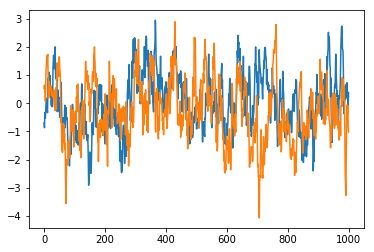

In [7]:
# plot the trajectory
plt.figure()
plt.plot(q_trajectory)
plt.show()

## Cumulative Histogram Output
The sampler also gives us the possibility to return the trajectory in the form of a cumulative histogram. This is achived by specifying the histogram bins and the outputmode in the sample function.

Specify the output bins as a np.array:

In [8]:
# initialise the histogram bins
q_bins = np.arange(-5.0,5.0,0.1)

We then simply feed these bins into the sample function and specify that we want to return the trajectory as a cumulative histogram.

In [9]:
# resample the model and return the
# sampled trajectory as a cumulative histogram
q_histogram = sampler.sample(nsteps=1000,
                             outputmode="cumulative_histogram",
                             qbins=q_bins)

Plot the cumulative histogram.

**Note**: np.histogram treats the q_bins given to it as the upper bin bound. Therefore we need to modify the q_bins array to be able to plot the histogram.

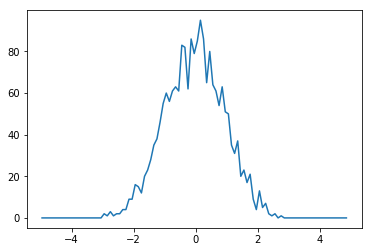

In [10]:
# plot the cummulative histogram over the two trajectories
# accounting for the interpretation of the q_bins vector by np.histogram
plt.figure()
deltaq = .5 * (q_bins[1] - q_bins[0])
plt.plot(q_bins[0:-1]+deltaq,q_histogram)
plt.show()

## Histogram Output

It is also possible to specify the returned output as histogram. This command returns the histogram of all the particles at the last timestep, $\text{n}_{\text{steps}}$.

**Note**: This output option isn't very useful when only using two particles as the output will only have two non-zero bins.

Alternatively, one can also specify the output mode as outputmode="cumulative_histogram". In this case histogram data is accumulated over the whole range of the trajectory

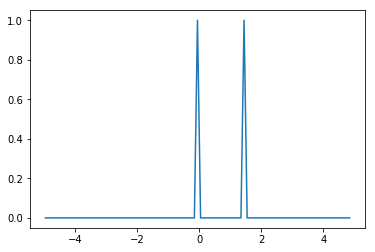

In [11]:
# resample the model and return the
# sampled trajectory as a histogram
q_bins = np.arange(-5.0,5.0,0.1)
q_histogram = sampler.sample(nsteps=1000,
                             outputmode="histogram",
                             qbins=q_bins)

# plot the histogram at nsteps for the two trajectories
# accounting for the interpretation of the q_bins vector by np.histogram
plt.figure()
deltaq = .5 * (q_bins[1] - q_bins[0])
plt.plot(q_bins[0:-1]+deltaq,q_histogram)
plt.show()